In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def f(x):
    return x**4 - 12*x - 5

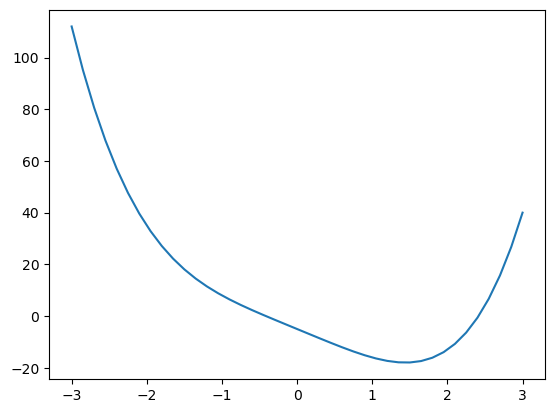

In [3]:
x_arr = np.linspace(-3, 3, 41)
y_arr = [f(t) for t in x_arr]
plt.plot(x_arr,y_arr)

## Metóda delenia intervalu (Brentova metóda)
Máme funkciu f jednej reálnej premennej a hľaddáme jej koreň medzi hodnotami a, b , a < b.

Algoritmus:

    1. x* = (a+b)/2
    2. Ak f(x*) <= 0: a = x*, b = b.
    3. Ak f(x*) > 0: a = a, b = x*
    4. delta = (b-a)/2
    5. Ak je delta < eps: vrátiť riešenie (a+b)/2 a odhad chyby delta
    6. Opakovať od 1.
    

In [4]:
def brent(f, a, b, eps = 1.0e-6, max_iter = 100):
    if f(a) > f(b) :
        a, b = b, a
    delta = abs(b-a)/2
    x_star = (a+b)/2
    while delta > eps:
        if f(x_star) <= 0:
            a = x_star
        else:
            b = x_star
        delta = abs(b-a)/2
        x_star = (a+b)/2
    return x_star, delta

In [5]:
x1, ex1 = brent(f, -3, 0)
print(f"koreň: {x1=} +/- {ex1}, hodnota: {f(x1)}")
x2, ex2 = brent(f, 0,3)
print(f"koreň: {x2=} +/- {ex2}, hodnota: {f(x2)}")

koreň: x1=-0.4142138957977295 +/- 7.152557373046875e-07, hodnota: 4.095878764154293e-06
koreň: x2=2.4142134189605713 +/- 7.152557373046875e-07, hodnota: -6.350918383191129e-06


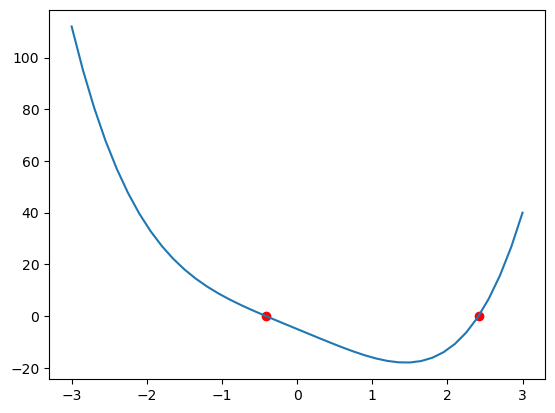

In [6]:
plt.plot(x_arr,y_arr)
plt.scatter([x1, x2], [f(x1), f(x2)], c = "r")

## Newtonova metóda
Nech $x^*$ je izolovaný koreň rovnice $f(x) = 0$, nech $x_0$ je bod taký, že v okolí  $x^*$ obsahujúcom $x_0$ existuje prvá a druhá derivácia $f(x)$ a tieto derivácie v tomto okolí nemenia znamienko. Potom 
$$
x_1 = x_0 - \frac{f(x(}{f'(x)} \\
|x_1 - x^*| < |x_0 - x^*|
$$
Opakovanou aplikáciou tohto pravidla sa môžme ľubovoľne priblížiť ku koreňu $x^*$.

In [7]:
def df(x):
    return 4*x**3 - 12

def newton_root(f, df, x0, eps = 1.0e-6):
    old_x = 1.0e12
    new_x = x0
    while abs(new_x - old_x) > eps:
        old_x = new_x
        new_x = old_x - f(old_x)/df(old_x)
    return new_x
    

In [8]:
x1 = newton_root(f, df, -3)
print(f"koreň: {x1=}, hodnota: {f(x1)}")
x2 = newton_root(f, df, 3)
print(f"koreň: {x2=}, hodnota: {f(x2)}")

koreň: x1=-0.4142135623730951, hodnota: 0.0
koreň: x2=2.4142135623730985, hodnota: 1.5276668818842154e-13


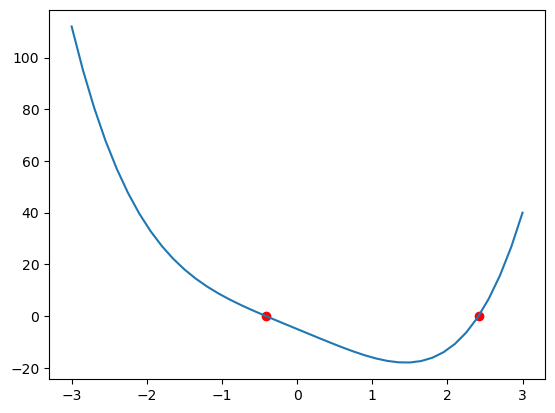

In [9]:
plt.plot(x_arr,y_arr)
plt.scatter([x1, x2], [f(x1), f(x2)], c = "r")